<a href="https://colab.research.google.com/github/deenaseban/machine-learning/blob/main/Adidas_Nike_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/content/Adidas Vs Nike.csv')
df.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15


In [ ]:
df.isna().sum()

Product Name     0
Product ID       0
Listing Price    0
Sale Price       0
Discount         0
Brand            0
Description      3
Rating           0
Reviews          0
Last Visited     0
dtype: int64

In [ ]:
df.dtypes

Product Name      object
Product ID        object
Listing Price      int64
Sale Price         int64
Discount           int64
Brand             object
Description       object
Rating           float64
Reviews            int64
Last Visited      object
dtype: object

In [ ]:
df.shape

(3268, 10)

In [ ]:
df['Brand'].value_counts()

Adidas CORE / NEO           1111
Adidas ORIGINALS             907
Nike                         643
Adidas SPORT PERFORMANCE     606
Adidas Adidas ORIGINALS        1
Name: Brand, dtype: int64

In [ ]:
df1=pd.get_dummies(df[['Brand']],drop_first=True)
df1

,Brand_Adidas CORE / NEO,Brand_Adidas ORIGINALS,Brand_Adidas SPORT PERFORMANCE,Brand_Nike
0,0,0,0,0
1,0,1,0,0
2,1,0,0,0
3,1,0,0,0
4,0,1,0,0
...,...,...,...,...
3263,0,0,0,1
3264,0,0,0,1
3265,0,0,0,1
3266,0,0,0,1


In [ ]:
df2=pd.concat([df,df1],axis=1)

In [ ]:
df2.drop(['Product Name','Product ID','Brand','Description','Last Visited'],axis=1,inplace=True)

In [ ]:
x=df2.iloc[:,::]
x

,Listing Price,Sale Price,Discount,Rating,Reviews,Brand_Adidas CORE / NEO,Brand_Adidas ORIGINALS,Brand_Adidas SPORT PERFORMANCE,Brand_Nike
0,14999,7499,50,4.8,41,0,0,0,0
1,7599,3799,50,3.3,24,0,1,0,0
2,999,599,40,2.6,37,1,0,0,0
3,6999,3499,50,4.1,35,1,0,0,0
4,7999,3999,50,3.5,72,0,1,0,0
...,...,...,...,...,...,...,...,...,...
3263,15995,12797,0,5.0,1,0,0,0,1
3264,4995,3497,0,0.0,0,0,0,0,1
3265,8495,5947,0,5.0,1,0,0,0,1
3266,0,16995,0,4.0,4,0,0,0,1


In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  data=KMeans(n_clusters=i,init='k-means++',random_state=42)
  data.fit_predict(x)
  wcss.append(data.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
print(wcss)

[133149496388.63303, 74823013454.95587, 42308709740.947014, 30162316285.73484, 23157649753.969032, 17943044639.324326, 14835299899.748951, 12819397804.644402, 11329807012.62607, 9819434738.63299]


Text(0.5, 1.0, 'Elbow Point Evaluatiion')

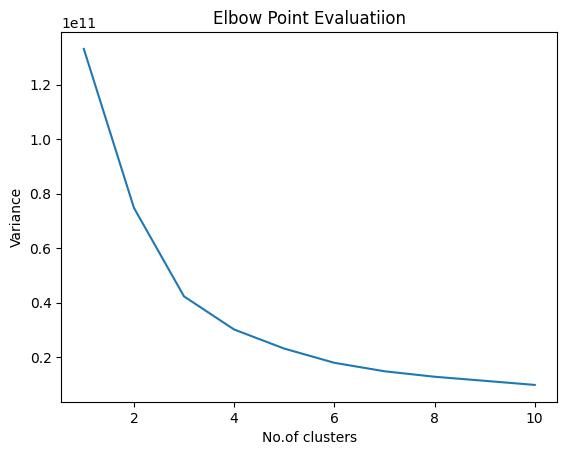

In [ ]:
plt.plot(range(1,11),wcss)
plt.xlabel('No.of clusters')
plt.ylabel('Variance')
plt.title('Elbow Point Evaluatiion')

In [ ]:
model=KMeans(n_clusters=6,init='k-means++',random_state=42)
y_means=model.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
x['Shoes Cluster']=y_means

In [ ]:
x1=df2.drop(['Shoes Cluster'],axis=1)
y=df2['Shoes Cluster']

In [ ]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y_train,y_test=train_test_split(x1,y,test_size=0.30,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x1_train)
x1_train=scaler.transform(x1_train)
x1_test=scaler.transform(x1_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3,weights='distance')
knn.fit(x1_train,y_train)
y_pred=knn.predict(x1_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))
print('Classification Report:')
print(classification_report(y_test,y_pred))

Accuracy Score: 0.9306829765545361
Confusion Matrix:
[[356   0   0   1  25   0]
 [  0  36   7   0   0   0]
 [  0   2 134   0   2   0]
 [  0   0   0  86   0   0]
 [ 23   0   8   0 259   0]
 [  0   0   0   0   0  42]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       382
           1       0.95      0.84      0.89        43
           2       0.90      0.97      0.93       138
           3       0.99      1.00      0.99        86
           4       0.91      0.89      0.90       290
           5       1.00      1.00      1.00        42

    accuracy                           0.93       981
   macro avg       0.95      0.94      0.94       981
weighted avg       0.93      0.93      0.93       981

